In [2]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

In [3]:
df<-read.csv('./Voltage_Drop.csv')

In [4]:
colnames(df)<-c('x','y')

# Spline

Polynoial order를 높이는 것 만으로 fit이 잘 안될 수 있음 특히 x의 범위에 따라 함수가 다르게 움질일 때<br>
x를 segment로 분할하여 세그먼트마다 적절한 fit

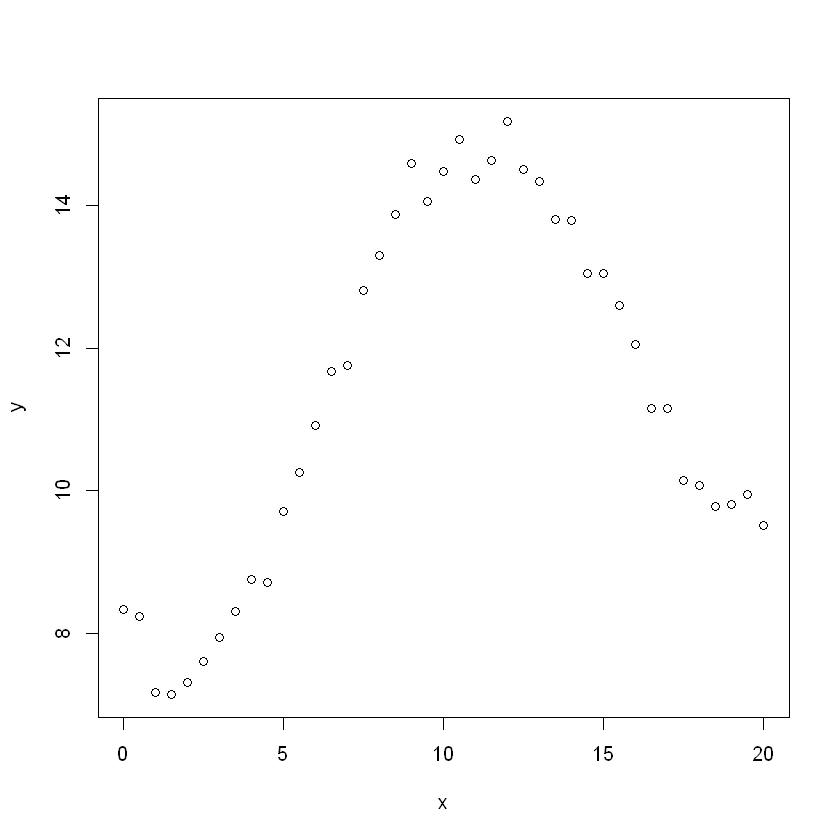

In [5]:
plot(df)

In [6]:
library(splines)

In [7]:
df2<-df
df2$x2<-df$x^2
df2$x3<-df$x^3
fit_poly<-lm(y~.,data=df2)

In [8]:
fit_cubic<-lm(y~bs(x,knots=c(6.5,13)), data=df)

In [9]:
summary(fit_cubic)


Call:
lm(formula = y ~ bs(x, knots = c(6.5, 13)), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45168 -0.18499 -0.03547  0.20577  0.61694 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  8.4657     0.2005  42.219  < 2e-16 ***
bs(x, knots = c(6.5, 13))1  -3.1484     0.3934  -8.002 2.04e-09 ***
bs(x, knots = c(6.5, 13))2   4.3532     0.2843  15.312  < 2e-16 ***
bs(x, knots = c(6.5, 13))3   8.5518     0.3691  23.169  < 2e-16 ***
bs(x, knots = c(6.5, 13))4   0.5990     0.3059   1.958 0.058192 .  
bs(x, knots = c(6.5, 13))5   1.2414     0.2871   4.324 0.000121 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2678 on 35 degrees of freedom
Multiple R-squared:  0.9904,	Adjusted R-squared:  0.9891 
F-statistic: 725.5 on 5 and 35 DF,  p-value: < 2.2e-16


In [10]:
summary(fit_poly)


Call:
lm(formula = y ~ ., data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3503 -0.7340 -0.1859  0.6440  1.8390 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.4910163  0.5336473  12.163 1.71e-14 ***
x            0.7031952  0.2339552   3.006 0.004738 ** 
x2           0.0340179  0.0273762   1.243 0.221829    
x3          -0.0033072  0.0008992  -3.678 0.000743 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9335 on 37 degrees of freedom
Multiple R-squared:  0.8773,	Adjusted R-squared:  0.8673 
F-statistic: 88.14 on 3 and 37 DF,  p-value: < 2.2e-16


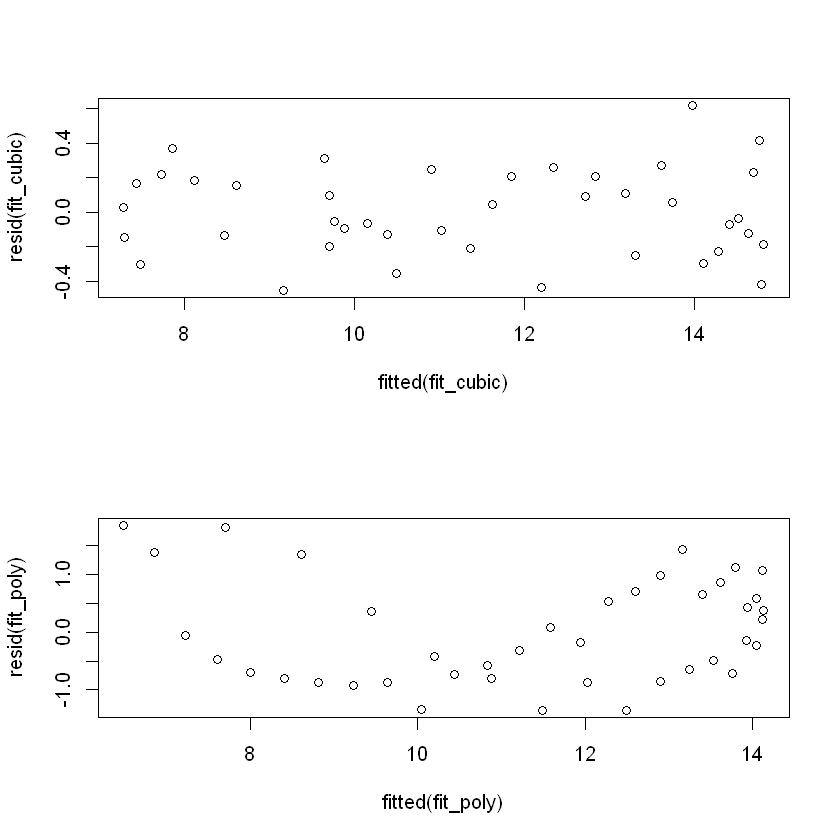

In [11]:
par(mfrow=c(2,1))
plot(fitted(fit_cubic),resid(fit_cubic))
plot(fitted(fit_poly),resid(fit_poly))

파리미터가 더 적은 polynomial과 비교<br>
poly의 경우 residual plot 봤을 때 강한 곡선의 관계가 나타나 적합하지 않음을 알 수 있음

In [12]:
anova(fit_poly,fit_cubic)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
37,32.244231,NA,NA,NA,NA
35,2.510255,2,29.73398,207.2876,3.955041e-20


extra sum of squares로 H0:B1=B2=0 검정 해봤을때, F0=207.29로 H0기각<br>
Cubic spline이 더 좋은 fit